In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import sys
from geoplots import geoplot
import os.path
from scipy.io import loadmat

from scipy.io import whosmat
from scipy.stats import linregress

In [51]:
# get masks info.
g_data_path = os.path.expanduser('~/Dropbox/MOCM/DATA')
msk_name = os.path.join(g_data_path,'M3d90x180x24v2.mat') 
msks = loadmat(msk_name,squeeze_me=True,struct_as_record=False)
ATL = msks['MSKS'].ATL[:,:,0:1]
PAC = msks['MSKS'].PAC[:,:,0:1]
IND = msks['MSKS'].IND[:,:,0:1]

In [52]:
# set lon. and lat.
lon = np.arange(1,360,2)
lat = np.arange(-89,90,2)

campl = plt.get_cmap('jet')

In [53]:
# figure output and cesm data directory.
figure_dir = os.path.expanduser('figure_output')
file1 = 'run006_90x180x60.mat'
runname = file1[0:6]  # used as figure titles

In [54]:
# geotrace observation.
file2 = 'geotrace_Pa231.mat'
file3 = 'geotrace_Th230.mat'
file4 = 'geotrace_Th232.mat'
file5 = 'geotrace_Th234t_90x180x60.mat'

In [55]:
# load cesm variables.
run001 = loadmat(file1)
Pa231_cesm = run001['Pa231']
Th230_cesm = run001['Th230']
Th232_cesm = run001['Th232']
Th234_cesm = run001['Th234']

In [56]:
# unit conversion: from dpm/m^3 to uBq/kg for Pa231 and Th230 
# unit conversion: from dpm/m^3 to mBq/kg for Th234
Pa231_cesm /= 0.0617
Th230_cesm /= 0.0617
Th234_cesm /= 61.7

In [57]:
# load geotrace observed data.
geot_Pa231 = loadmat(file2)
Pa231_geot = geot_Pa231['Pa231obs']
geot_Th230 = loadmat(file3)
Th230_geot = geot_Th230['Th230obs']
geot_Th232 = loadmat(file4)
Th232_geot = geot_Th232['Th232obs']
geot_Th234 = loadmat(file5)
Th234_geot = geot_Th234['Th234t']

separate data into upper and lower sections

In [58]:
# seperate ocean into upper (<3000m) and lower(>3000m) layers.
upper_Th230 = Th230_geot.copy()
lower_Th230 = Th230_geot.copy()
upper_Th230[:,:,46:61] = 0
lower_Th230[:,:,0:46] = 0

In [59]:
# get index.
upper_Pa231 = Pa231_geot.copy()
lower_Pa231 = Pa231_geot.copy()
upper_Pa231[:,:,46:61] = 0
lower_Pa231[:,:,0:46] = 0 

In [60]:
# get ready to contour plot for Th234
plt.close('all')
# define figure size, and number of rows and columns
fig = plt.figure(figsize=(16, 12))
nrow, ncol = 2, 2

depth_layer = [1, 4, 10, 30]  # corresponding to 10m, 500m, 2000m, and 5000m.
depth = [15, 45, 105, 450]

levels = np.linspace(20,50,31)
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0., 1., len(levels)))
bounds = np.array(levels)

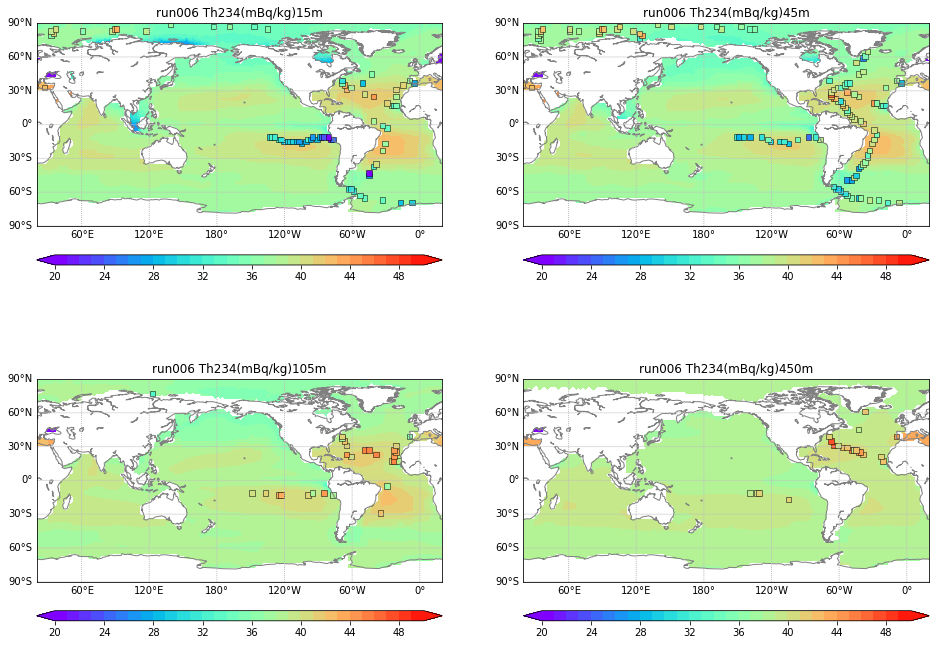

In [61]:
count = 1
for layer in depth_layer:
    title = runname + ' ' +'Th234' + '(mBq/kg)' + str(depth[count - 1]) + 'm'
    ax1 = fig.add_subplot(nrow, ncol, count)
    count += 1

    geoplot(Th234_cesm[:,:,layer],lon,lat, lon_0=200, levels=levels, 
            colors=colors, fill_cotinents=True,hide_cbaar=True,
            plot_type='contourf',cbar_type='h')
    plt.title(title)
    Lon,Lat = np.meshgrid(lon,lat)
    Th234_geot = np.ma.masked_where(Th234_geot <= 0, Th234_geot)
    sc = plt.scatter(Lon, Lat, c=Th234_geot[:,:,layer], marker='s',
                         s=30, cmap=plt.get_cmap('rainbow', 30),
                         edgecolors='black', lw=0.5, alpha=1.0)
    plt.clim(20, 50)
#     plt.colorbar(sc)
fig_Th234_name = runname+'_Th234.eps'
Th234_name = os.path.join(figure_dir, fig_Th234_name)
plt.savefig(Th234_name)
plt.show()
# whosmat(file5)

In [62]:
# get mask for invalid values based on geotrace Pa231
iupper_Pa231 = np.ma.masked_where(upper_Pa231<=0,upper_Pa231)
ilower_Pa231 = np.ma.masked_where(lower_Pa231<=0,lower_Pa231)

iupper_Th230 = np.ma.masked_where(upper_Th230<=0,upper_Th230)
ilower_Th230 = np.ma.masked_where(lower_Th230<=0,lower_Th230)

In [63]:
#  mask out invalid values for geotrace data.
u_Pa231_geot = np.ma.masked_where(np.ma.getmask(iupper_Pa231),upper_Pa231)
l_Pa231_geot = np.ma.masked_where(np.ma.getmask(ilower_Pa231),lower_Pa231)

u_Th230_geot = np.ma.masked_where(np.ma.getmask(iupper_Th230),upper_Th230)
l_Th230_geot = np.ma.masked_where(np.ma.getmask(ilower_Th230),lower_Th230)

In [64]:
# mask out invalid values for cesm data.
u_Pa231_cesm = np.ma.masked_where(np.ma.getmask(iupper_Pa231),Pa231_cesm)
l_Pa231_cesm = np.ma.masked_where(np.ma.getmask(ilower_Pa231),Pa231_cesm)

u_Th230_cesm = np.ma.masked_where(np.ma.getmask(iupper_Th230),Th230_cesm)
l_Th230_cesm = np.ma.masked_where(np.ma.getmask(ilower_Th230),Th230_cesm)

In [65]:
# iupper = np.ma.masked_where(u_Pa231_geot<=0, u_Pa231_geot)
# ilower = np.ma.masked_where(l_Pa231_geot<=0, l_Pa231_geot)

In [66]:
# compress data to vectors .
tmp_u_Pa231_cesm = np.ma.compressed(u_Pa231_cesm)
tmp_u_Pa231_geot = np.ma.compressed(u_Pa231_geot)

tmp_u_Th230_cesm = np.ma.compressed(u_Th230_cesm)
tmp_u_Th230_geot = np.ma.compressed(u_Th230_geot)

tmp_l_Pa231_cesm = np.ma.compressed(l_Pa231_cesm)
tmp_l_Pa231_geot = np.ma.compressed(l_Pa231_geot)

tmp_l_Th230_cesm = np.ma.compressed(l_Th230_cesm)
tmp_l_Th230_geot = np.ma.compressed(l_Th230_geot)

# and get mask based on cesm data.
u_Pa231_nan_msk = np.ma.masked_invalid(tmp_u_Pa231_cesm)
l_Pa231_nan_msk = np.ma.masked_invalid(tmp_l_Pa231_cesm)

u_Th230_nan_msk = np.ma.masked_invalid(tmp_u_Th230_cesm)
l_Th230_nan_msk = np.ma.masked_invalid(tmp_l_Th230_cesm)

In [67]:
# mask out invalid data based on masks obtained in last step.
u_Pa231_cesm = np.ma.masked_where(np.ma.getmask(u_Pa231_nan_msk),tmp_u_Pa231_cesm)
u_Pa231_geot = np.ma.masked_where(np.ma.getmask(u_Pa231_nan_msk),tmp_u_Pa231_geot)

l_Pa231_cesm = np.ma.masked_where(np.ma.getmask(l_Pa231_nan_msk),tmp_l_Pa231_cesm)
l_Pa231_geot = np.ma.masked_where(np.ma.getmask(l_Pa231_nan_msk),tmp_l_Pa231_geot)


u_Th230_cesm = np.ma.masked_where(np.ma.getmask(u_Th230_nan_msk),tmp_u_Th230_cesm)
u_Th230_geot = np.ma.masked_where(np.ma.getmask(u_Th230_nan_msk),tmp_u_Th230_geot)

l_Th230_cesm = np.ma.masked_where(np.ma.getmask(l_Th230_nan_msk),tmp_l_Th230_cesm)
l_Th230_geot = np.ma.masked_where(np.ma.getmask(l_Th230_nan_msk),tmp_l_Th230_geot)

In [68]:
# get vector data.
vec_u_Pa231_cesm = np.ma.compressed(u_Pa231_cesm) 
vec_u_Pa231_geot = np.ma.compressed(u_Pa231_geot)

vec_u_Th230_cesm = np.ma.compressed(u_Th230_cesm) 
vec_u_Th230_geot = np.ma.compressed(u_Th230_geot)

vec_l_Pa231_cesm = np.ma.compressed(l_Pa231_cesm)
vec_l_Pa231_geot = np.ma.compressed(l_Pa231_geot)

vec_l_Th230_cesm = np.ma.compressed(l_Th230_cesm)
vec_l_Th230_geot = np.ma.compressed(l_Th230_geot)

In [69]:
# slope, intercept, r_value, p_value, std_err = linregress(x, y)
slope_u_Pa231, intercept_u_Pa231, r_value_u_Pa231, p_value_u_Pa231, std_err_l_Pa231 = linregress(vec_u_Pa231_cesm, vec_u_Pa231_geot)
slope_l_Pa231, intercept_l_Pa231, r_value_l_Pa231, p_value_l_Pa231, std_err_l_Pa231 = linregress(vec_l_Pa231_cesm, vec_l_Pa231_geot)

slope_u_Th230, intercept_u_Th230, r_value_u_Th230, p_value_u_Th230, std_err_l_Th230 = linregress(vec_u_Th230_cesm, vec_u_Th230_geot)
slope_l_Th230, intercept_l_Th230, r_value_l_Th230, p_value_l_Th230, std_err_l_Th230 = linregress(vec_l_Th230_cesm, vec_l_Th230_geot)
# s3 = " %s and %s living together" % (s1, s2)
r2_u_Pa231 = ('(r$^2$ = %1.2f)' %r_value_u_Pa231**2)
r2_l_Pa231 = ('(r$^2$ = %1.2f)' %r_value_l_Pa231**2)
r2_u_Th230 = ('(r$^2$ = %1.2f)' %r_value_u_Th230**2)
r2_l_Th230 = ('(r$^2$ = %1.2f)' %r_value_l_Th230**2)

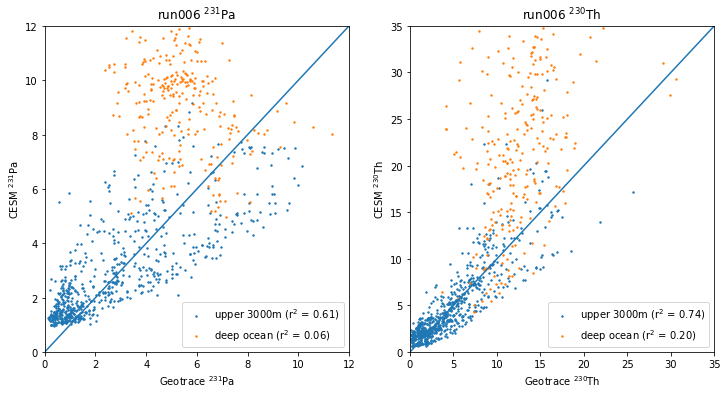

In [70]:
# draw scatter plot for Th230 and Pa231
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), nrows=1,ncols =2)
ax1.scatter(vec_u_Pa231_geot, vec_u_Pa231_cesm, s=2, alpha=1.0, label='upper 3000m'+' '+(r2_u_Pa231))
ax1.scatter(vec_l_Pa231_geot, vec_l_Pa231_cesm, s=2, alpha=1.0, label='deep ocean'+' '+(r2_l_Pa231))
ax1.plot([0,12],[0,12])

ax1.set_xlim(0,12)
ax1.set_ylim(0,12)
ax1.set_title(runname + ' ' +'$^{231}$Pa')
ax1.set_xlabel('Geotrace $^{231}$Pa')
ax1.set_ylabel('CESM $^{231}$Pa')
ax1.legend()

####
ax2.scatter(vec_u_Th230_geot,vec_u_Th230_cesm, s=2, alpha=1.0, label='upper 3000m'+' '+(r2_u_Th230))
ax2.scatter(vec_l_Th230_geot,vec_l_Th230_cesm, s=2, alpha=1.0, label='deep ocean'+' '+(r2_l_Th230))
ax2.plot([0,35],[0,35])

ax2.set_xlim(0,35)
ax2.set_ylim(0,35)
ax2.set_title(runname + ' ' +'$^{230}$Th')
ax2.set_xlabel('Geotrace $^{230}$Th')
ax2.set_ylabel('CESM $^{230}$Th')
ax2.legend()

figure_name = runname+'_Th230_Pa231.eps'
saved_name = os.path.join(figure_dir, figure_name)
plt.savefig(saved_name)
plt.show()

In [45]:
xt = msks['grid'].xt
yt = msks['grid'].yt
dz = run001['dz']
dAt = msks['grid'].DXT3d*msks['grid'].DYT3d
dVt = dAt[:,:,0:1]*dz.transpose()
zt = np.cumsum(dz)

/Users/weileiwang/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/weileiwang/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


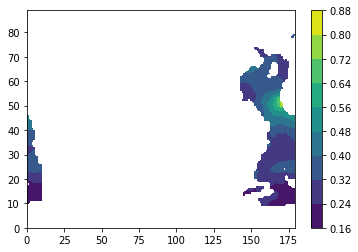

In [46]:
R = ((Pa231_cesm/Th230_cesm)*ATL*dVt)/(ATL*dVt)
R[R==0] = np.nan
ATL_R = np.nanmean(R, axis = 1)
cs = plt.contourf(R[:,:,50]);plt.colorbar(cs);plt.show()

In [47]:
Z, Y =np.meshgrid(-zt,yt)
cmap = plt.get_cmap('rainbow')
levels = np.linspace(0,1.0,11)
colors = cmap(np.linspace(0., 1, len(levels) + 1))

In [48]:
CS = plt.contourf(Y,Z,ATL_R,
                  colors=colors,
                  levels=levels,
                  extend='both')

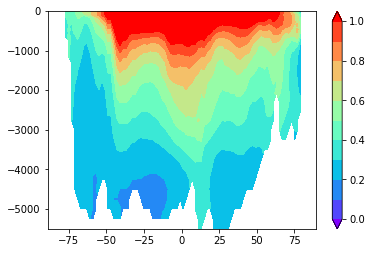

In [49]:
plt.colorbar(CS)
plt.show() 